<a href="https://colab.research.google.com/github/etrahadias/CS620Project/blob/main/Trahadias_CS620_DataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Travel](https://drive.google.com/uc?export=view&id=12ADuKga-IdVDh88RBrBmfocYSq6qtfdp)



# **Life After Lockdown: An Analysis of COVID-19's Impact on Travel Trends**

**Name:** Elizabeth Trahadias

**Email:** etrah001@odu.edu

**Portfolio:** https://etrahadias.github.io/


### **Abstract**

In March of 2020, the world temporarily shut down due to the COVID-19 pandemic. A lot of time was spent at home, businesses closed, holidays were celebrated via Zoom, and students and employees learned to work from home. Another major factor of life that was impacted by the pandemic was travel.

I am looking to explore how travel trends have evolved over 2019, 2020, and 2021. I am curious to see if there is a relationship between the number of COVID-19 cases, the popularity of certain travel destinations, and the number of airline passengers. The **end goal** of the project is to visualize travel trends with COVID-19 statistics and to create a model that determines the relationship between airline passengers and number of COVID-19 cases.


#### **Goals**

The objectives of this project are to:

* Merge and clean multiple data sets
* Perform exploratory data analysis
* Practice data wrangling
* Analyze U.S. travel trends in 2019 versus travel trends during the COVID-19 pandemic (i.e. most popular airlines, common destinations and travel months, number of people traveling, total number of flights, the number of international flights, etc.)
* Determine if there is a relationship between number of positive U.S. COVID-19 cases vs number of people traveling on airplanes
* Create interactive visualizations that display popular U.S. travel destinations and airlines before and during the pandemic
* Create visualizations that show COVID-19 trends in the U.S.
* Determine the impact of COVID-19 on airlines' profitability in the U.S. *(TBD if this will be explored -- would appreciate feedback on this idea)*

#### **Data Sources**

There are multiple data sets needed to investigate the above objectives. The first 3 data sets are from the [Bureau of Transportation Statistics](https://www.transtats.bts.gov/Tables.asp?QO_VQ=EEE&QO_anzr=Nv4%FDPn44vr4%FDf6n6v56vp5%FD%FLS14z%FDHE%FDg4nssvp%FM-%FDNyy%FDPn44vr45&QO_fu146_anzr=Nv4%FDPn44vr45). I am using data from the T-100 Market (All Carriers) section. Air carriers report monthly air traffic information using the Form T-100, and it is entered into the Air Carrier Statistics database. The data sets display information like the number of airline passengers, the departures and destinations for flights entering into and departing from the U.S., and the month. Since each csv file represents a year (2019, 2020, & 2021), I will need to combine the 3 data sets into one for ease of analysis. A description of the variables in this data set can be found [here](https://www.transtats.bts.gov/TableInfo.asp?gnoyr_VQ=FMF&QO_fu146_anzr=Nv4%20Pn44vr45&V0s1_b0yB=D).

The dataset with the COVID-19 case information is from the [CDC](https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36/data), and it is a relatively messy data set. It appears the data was entered or submitted by users, and there are a lot of missing values. This data set contains information about the number of new COVID-19 cases and deaths by day per state in the United States. I will be using data from the [Census](https://www.census.gov/programs-surveys/popest/technical-documentation/research/evaluation-estimates/2020-evaluation-estimates/2010s-state-total.html) to obtain an approximate numbers for the population per state in order to normalize the COVID-19 data.

Since the airplane flight data is broken down by month and the CDC data is broken down by day, I will have to clean the CDC data, organize it by month, and merge it with a modified version of the airline data to show the relationship between the number of COVID-19 cases and the number of people traveling per month.

*TBD - I may try to incorporate the data below to explore COVID-19's impact on airline profitability. Possible data source for airline profitability can be found [here](https://www.transtats.bts.gov/Data_Elements_Financial.aspx?Qn6n=K).*

#### **Project Timeline**

* **Abstract**: 08/31/21-9/14/21
* **Data cleaning and data wrangling**: 9/15/21-9/25/21
* **Exploratory data analysis & any left over data wrangling**: 9/26/21-10/4/21
* **Exploratory data analysis / Prep for Progress Check I**: 10/5/21-10/12/21
* **Create visualizations**: 10/13/21-10/27/21
* **Explore relationships and linear regression models:** 10/28/21-11/8/21
* **Prep for Progress Check II:** 11/9/21-11/16/21
* **Final touches and analyses:** 11/17/21-11/25/21
* **Prepare and proofread final report:** 11/26/21-12/2/21
* **Create video:** 12/3/21-12/10/21
* **Submit:** 12/10/21

    *Note: Project timeline is somewhat flexible, as roadblocks are to be expected and some sections may take longer than others.*

![Gantt](https://drive.google.com/uc?export=view&id=1QM9pOlmt9D2qioEgPEFUUK6jTjkgU8u5)

### **Progress Check I - 10/17/21**

* Some design decisions I have made are to remove unnecessary data columns and to fill in missing COVID-19 data with 0 values. The international flight data may be too overwhelming, so I may filter the data to just US flights.
* The target audience for this project is anyone who is interested in learning about how COVID-19 has impacted the travel industry. Airlines can use this data to see trends between COVID-19 cases and travel destinations and which airlines have remained popular throughout the pandemic.
* The tools/technologies I will be using for this project include Google Colab and numerous Python libraries. I will be using a lot of the plotting libraries (matplotlib, seaborn, etc) to creat visualizations, which is the end goal of the project.
* The only data model I anticipate on including in this project is a linear regression model that shows if there is a relationship between number of COVID-19 cases and number of airline passengers.
* The overall design of the project and the final outcome will be a series of visualizations that explore two main topics: how travel trends have changed over time and how COVID-19 has impacted the travel industry.
* The current status of my project is that I am wrapping up the data exploration and moving to the visualization part. Since the Abstract, I have imported, cleaned, and explored the data.
* The remaining tasks left to complete the project are to create the final visualizations that show how the travel industry has been impacted by COVID-19. Some of the visualizations I'd like to include will explore the popular airlines and destinations prior to and during the height of the pandemic and the relationship between COVID-19 cases and airline travel. In addition, I want to make a linear regression model. The last step will be to create the final report and video.

### **Importing the Data**


In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from numpy import nan as NaN
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Mount to Google Drive to import the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read in primary data sets with Pandas
# These data sets show airline information (number of passengers, destinations, etc.)
flights19=pd.read_csv("/content/drive/My Drive/CS 620/Project/flights19.csv")
flights20=pd.read_csv("/content/drive/My Drive/CS 620/Project/flights20.csv")
flights21=pd.read_csv("/content/drive/My Drive/CS 620/Project/flights21.csv")

In [4]:
# Show the first few lines of data for the 2019 airline data
flights19.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 41
0,0.0,9338.0,0.0,1408.0,U7,20447,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,11721,1172105,31721,FNT,"Flint, MI",MI,26.0,Michigan,US,United States,43,2019,2,4,3,P,DU,NaN
1,0.0,4642.0,0.0,466.0,U7,20447,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,12598,1259802,32598,JZT,"Arlington, TX",TX,48.0,Texas,US,United States,74,2019,2,4,1,P,DU,NaN
2,0.0,10513.0,0.0,1375.0,U7,20447,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,16091,1609105,31295,YIP,"Detroit, MI",MI,26.0,Michigan,US,United States,43,2019,2,4,3,P,DU,NaN
3,0.0,8894.0,0.0,1378.0,U7,20447,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2,10874,1087402,30647,CAK,"Akron, OH",OH,39.0,Ohio,US,United States,44,13061,1306106,33038,LRD,"Laredo, TX",TX,48.0,Texas,US,United States,74,2019,2,4,3,P,DU,NaN
4,0.0,983.0,0.0,355.0,U7,20447,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2,11146,1114607,31146,CRW,"Charleston/Dunbar, WV",WV,54.0,West Virginia,US,United States,39,12265,1226505,32265,IAG,"Niagara Falls, NY",NY,36.0,New York,US,United States,22,2019,2,4,1,P,DU,NaN


In [5]:
# Show the first few lines of data for the 2020 airline data
flights20.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 41
0,0.0,165.0,3641.0,373.0,KO,20341.0,Alaska Central Express,06019,D,KO,Alaska Central Express,1,5.0,15991,1599102,35991,YAK,"Yakutat, AK",AK,2.0,Alaska,US,United States,1,10299,1029906,30299,ANC,"Anchorage, AK",AK,2.0,Alaska,US,United States,1,2020,1,1,1,G,DU,NaN
1,0.0,751.0,161.0,557.0,KO,20341.0,Alaska Central Express,06019,D,KO,Alaska Central Express,1,5.0,10299,1029906,30299,ANC,"Anchorage, AK",AK,2.0,Alaska,US,United States,1,14738,1473802,34738,SDP,"Sandpoint, AK",AK,2.0,Alaska,US,United States,1,2020,1,1,2,L,DU,NaN
2,0.0,0.0,0.0,385.0,AN,21894.0,"ADVANCED AIR, LLC",01229,D,AN,"ADVANCED AIR, LLC",1,6.0,12127,1212702,32575,HHR,"Hawthorne, CA",CA,6.0,California,US,United States,91,15232,1523201,35232,TKF,"Truckee, CA",CA,6.0,California,US,United States,91,2020,1,1,1,F,DU,NaN
3,0.0,0.0,0.0,385.0,AN,21894.0,"ADVANCED AIR, LLC",01229,D,AN,"ADVANCED AIR, LLC",1,6.0,15232,1523201,35232,TKF,"Truckee, CA",CA,6.0,California,US,United States,91,12127,1212702,32575,HHR,"Hawthorne, CA",CA,6.0,California,US,United States,91,2020,1,1,1,F,DU,NaN
4,0.0,10362.0,0.0,4620.0,ADB,20110.0,Antonov Company,9488B,I,ADB,Antonov Company,0,0.0,15256,1525605,35256,TLS,"Toulouse, France",NaN,NaN,NaN,FR,France,427,13303,1330303,32467,MIA,"Miami, FL",FL,12.0,Florida,US,United States,33,2020,1,2,10,P,IF,NaN


In [6]:
# Show the first few lines of data for the 2021 airline data
# Note: this data goes up to February 2021
flights21.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 41
0,0.0,732068.0,0.0,196.0,5X,19917,United Parcel Service,06910,D,5X,United Parcel Service,3,3,14730,1473004,33044,SDF,"Louisville, KY",KY,21.0,Kentucky,US,United States,52,11823,1182304,31823,FWA,"Fort Wayne, IN",IN,18.0,Indiana,US,United States,42,2021,1,2,1,G,DU,NaN
1,0.0,619050.0,0.0,1630.0,5X,19917,United Parcel Service,06910,D,5X,United Parcel Service,3,3,14730,1473004,33044,SDF,"Louisville, KY",KY,21.0,Kentucky,US,United States,52,10713,1071302,30713,BOI,"Boise, ID",ID,16.0,Idaho,US,United States,83,2021,1,2,4,G,DU,NaN
2,0.0,3966220.0,272048.0,942.0,5X,19917,United Parcel Service,06910,D,5X,United Parcel Service,3,3,14730,1473004,33044,SDF,"Louisville, KY",KY,21.0,Kentucky,US,United States,52,14683,1468305,33214,SAT,"San Antonio, TX",TX,48.0,Texas,US,United States,74,2021,1,2,2,G,DU,NaN
3,0.0,998701.0,0.0,473.0,5X,19917,United Parcel Service,06910,D,5X,United Parcel Service,3,3,14730,1473004,33044,SDF,"Louisville, KY",KY,21.0,Kentucky,US,United States,52,12448,1244807,32448,JAN,"Jackson/Vicksburg, MS",MS,28.0,Mississippi,US,United States,53,2021,1,2,1,G,DU,NaN
4,0.0,882144.0,0.0,1102.0,5X,19917,United Parcel Service,06910,D,5X,United Parcel Service,3,3,14730,1473004,33044,SDF,"Louisville, KY",KY,21.0,Kentucky,US,United States,52,13256,1325602,33256,MFE,"Mission/McAllen/Edinburg, TX",TX,48.0,Texas,US,United States,74,2021,1,2,3,G,DU,NaN


In [7]:
# Read in secondary data set with Pandas
# This is data from the CDC that shows COVID-19 case information per state by day
covid=pd.read_csv("/content/drive/My Drive/CS 620/Project/COVID.csv")

In [8]:
# Show the first few lines of data for the COVID-19 case information
covid.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,09/01/2021,ND,"118,491","107,475","11,016",536,66,"1,562",NaN,NaN,1,0,09/02/2021 01:49:05 PM,Agree,Not agree
1,02/02/2021,IL,"1,130,917","1,130,917",0,"2,304",0,"21,336","19,306","2,030",63,16,02/03/2021 02:55:58 PM,Agree,Agree
2,02/02/2021,MS,"280,182","176,228","103,954","1,059",559,"6,730","4,739","1,991",13,7,02/04/2021 12:00:00 AM,Agree,Agree
3,05/03/2020,NH,"2,518",NaN,NaN,89,0,86,NaN,NaN,2,0,05/04/2020 10:49:24 PM,Not agree,Not agree
4,07/31/2020,ND,"6,602","6,602",0,133,0,103,NaN,NaN,0,0,08/01/2020 02:38:12 PM,Agree,Not agree


In [9]:
# Are there missing values in this data set?

covid.isnull().any()

submission_date    False
state              False
tot_cases          False
conf_cases          True
prob_cases          True
new_case           False
pnew_case           True
tot_death          False
conf_death          True
prob_death          True
new_death          False
pnew_death          True
created_at         False
consent_cases       True
consent_deaths      True
dtype: bool

It appears that at least 8 columns host missing data values in the COVID-19 data set.

In [10]:
# Import the Census population data
pop=pd.read_csv("/content/drive/My Drive/CS 620/Project/nst-est2020.csv",
                usecols=['NAME', 'POPESTIMATE2019', 'POPESTIMATE2020'])
pop.head(10)

,NAME,POPESTIMATE2019,POPESTIMATE2020
0,United States,328329953,329484123
1,Northeast Region,56002934,55849869
2,Midwest Region,68340091,68316744
3,South Region,125686544,126662754
4,West Region,78300384,78654756
5,Alabama,4907965,4921532
6,Alaska,733603,731158
7,Arizona,7291843,7421401
8,Arkansas,3020985,3030522
9,California,39437610,39368078


### **Merging the Airline Data**

The `flights19`, `flights20`, and `flights21` data sets need to be combined into one. Each data set has the same column headers, so we simply need to connect all three data sets together.

In [11]:
# Concatenate the 3 data frames

flights=pd.concat([flights19,flights20,flights21])

In [12]:
# View the combined data

flights.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 41
0,0.0,9338.0,0.0,1408.0,U7,20447.0,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2.0,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,11721,1172105,31721,FNT,"Flint, MI",MI,26.0,Michigan,US,United States,43,2019,2,4,3,P,DU,NaN
1,0.0,4642.0,0.0,466.0,U7,20447.0,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2.0,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,12598,1259802,32598,JZT,"Arlington, TX",TX,48.0,Texas,US,United States,74,2019,2,4,1,P,DU,NaN
2,0.0,10513.0,0.0,1375.0,U7,20447.0,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2.0,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,16091,1609105,31295,YIP,"Detroit, MI",MI,26.0,Michigan,US,United States,43,2019,2,4,3,P,DU,NaN
3,0.0,8894.0,0.0,1378.0,U7,20447.0,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2.0,10874,1087402,30647,CAK,"Akron, OH",OH,39.0,Ohio,US,United States,44,13061,1306106,33038,LRD,"Laredo, TX",TX,48.0,Texas,US,United States,74,2019,2,4,3,P,DU,NaN
4,0.0,983.0,0.0,355.0,U7,20447.0,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2.0,11146,1114607,31146,CRW,"Charleston/Dunbar, WV",WV,54.0,West Virginia,US,United States,39,12265,1226505,32265,IAG,"Niagara Falls, NY",NY,36.0,New York,US,United States,22,2019,2,4,1,P,DU,NaN


In [13]:
# Get an idea of the shape of the data
flights.shape

# 596729 rows and 42 columns

(596729, 42)

### **Cleaning the Data**

Before the COVID-19 data can be merged into the data with the travel information, the data sets need to be cleaned, especially the COVID-19 data.

I am going to start the data wrangling process by cleaning the `flights` data set. I am going to remove unnecessary rows and columns and handle missing data values to make analysis easier.

In the first column of the `flights` data, any row where `PASSENGERS == 0` indicates that this is a freight or mail flight. I am only interested in passenger flights, so I am going to filter out any row where `PASSENGERS == 0`.

#### Cleaning the Flights Data



In [14]:
# I prefer all lower case column titles, so I will change them
flights.columns= flights.columns.str.lower()

# Remove data where passengers==0
flights=flights[flights.passengers != 0]

# See how many rows we have now
flights.shape

(471985, 42)

We now have 471985 rows and 42 columns, and our DataFrame consists of passenger only data. There are a few columns that contain duplicate or irrelevant data. I am going to remove these columns. There is one column in our DataFrame that consists of null, or NaN, values. I am going to remove this column, too, as it does not impact the analysis.


In [15]:
# Get a list of the columns
flights.columns

Index(['passengers', 'freight', 'mail', 'distance', 'unique_carrier',
       'airline_id', 'unique_carrier_name', 'unique_carrier_entity', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_airport_seq_id', 'origin_city_market_id',
       'origin', 'origin_city_name', 'origin_state_abr', 'origin_state_fips',
       'origin_state_nm', 'origin_country', 'origin_country_name',
       'origin_wac', 'dest_airport_id', 'dest_airport_seq_id',
       'dest_city_market_id', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_fips', 'dest_state_nm', 'dest_country', 'dest_country_name',
       'dest_wac', 'year', 'quarter', 'month', 'distance_group', 'class',
       'data_source', 'unnamed: 41'],
      dtype='object')

In [16]:
# Remove unnecessary columns

flights = flights.drop(['freight', 'mail', 'unique_carrier',
                        'unnamed: 41', 'airline_id', 
                        'unique_carrier_entity', 'carrier', 'origin_airport_id',
                        'origin_airport_seq_id', 'origin_city_market_id',
                        'origin_state_fips', 'origin_wac', 'dest_airport_id',
                        'dest_airport_seq_id', 'dest_city_market_id', 
                        'dest_state_fips', 'dest_wac'], axis=1)

In [17]:
# Checking out our new DataFrame
flights.head()

,passengers,distance,unique_carrier_name,region,carrier_name,carrier_group,carrier_group_new,origin,origin_city_name,origin_state_abr,origin_state_nm,origin_country,origin_country_name,dest,dest_city_name,dest_state_abr,dest_state_nm,dest_country,dest_country_name,year,quarter,month,distance_group,class,data_source
57517,1.0,8.0,Smokey Bay Air Inc.,D,Smokey Bay Air Inc.,1,5.0,PGM,"Port Graham, AK",AK,Alaska,US,United States,SOV,"Seldovia, AK",AK,Alaska,US,United States,2019,2,6,1,F,DU
57518,1.0,46.0,Island Air Service,D,Island Air Service,1,5.0,A43,"Kodiak Island, AK",AK,Alaska,US,United States,KPR,"Port Williams, AK",AK,Alaska,US,United States,2019,2,6,1,F,DU
57519,1.0,26.0,Island Air Service,D,Island Air Service,1,5.0,A43,"Kodiak Island, AK",AK,Alaska,US,United States,KPY,"Port Bailey, AK",AK,Alaska,US,United States,2019,2,6,1,L,DU
57520,1.0,43.0,Island Air Service,D,Island Air Service,1,5.0,A43,"Kodiak Island, AK",AK,Alaska,US,United States,KWP,"West Point, AK",AK,Alaska,US,United States,2019,2,6,1,L,DU
57521,1.0,93.0,Island Air Service,D,Island Air Service,1,5.0,ALZ,"Lazy Bay, AK",AK,Alaska,US,United States,A43,"Kodiak Island, AK",AK,Alaska,US,United States,2019,2,6,1,L,DU


In [18]:
# Checking for null values
print(flights.isnull().values.any())
print(flights.isnull().sum())

True
passengers                 0
distance                   0
unique_carrier_name        2
region                     2
carrier_name               2
carrier_group              0
carrier_group_new          2
origin                     0
origin_city_name           0
origin_state_abr       37130
origin_state_nm        37130
origin_country             0
origin_country_name        0
dest                       0
dest_city_name             0
dest_state_abr         36831
dest_state_nm          36831
dest_country               0
dest_country_name          0
year                       0
quarter                    0
month                      0
distance_group             0
class                      0
data_source                0
dtype: int64


In the code below, I am examining why there are null values in origin_state_abr, origin_state_nm, dest_state_abr, and dest_state_nm. My initial thought is that these are international flights.

In [19]:
# Make a DataFrame that only consists of rows with NaN values
is_NaN = flights.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = flights[row_has_NaN]
rows_with_NaN

,passengers,distance,unique_carrier_name,region,carrier_name,carrier_group,carrier_group_new,origin,origin_city_name,origin_state_abr,origin_state_nm,origin_country,origin_country_name,dest,dest_city_name,dest_state_abr,dest_state_nm,dest_country,dest_country_name,year,quarter,month,distance_group,class,data_source
57739,1.0,4288.0,Blue Jet SP Z o o,I,Blue Jet SP Z o o,0,0.0,LED,"St. Petersburg, Russia",NaN,NaN,RU,Russia,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,2019,1,2,9,L,IF
57740,1.0,4288.0,Blue Jet SP Z o o,I,Blue Jet SP Z o o,0,0.0,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,LED,"St. Petersburg, Russia",NaN,NaN,RU,Russia,2019,1,2,9,L,IF
57741,1.0,94.0,Talofa Airways Limited,I,Talofa Airways Limited,0,0.0,PPG,"Pago Pago, TT",TT,U.S. Pacific Trust Territories and Possessions,US,United States,APW,"Apia, Samoa",NaN,NaN,WS,Samoa,2019,1,2,1,F,IF
57765,1.0,3470.0,Albinati aviation Limited,I,Albinati aviation Limited,0,0.0,DUB,"Dublin, Ireland",NaN,NaN,IE,Ireland,PTK,"Pontiac, MI",MI,Michigan,US,United States,2019,1,2,7,L,IF
57766,1.0,4040.0,Albinati aviation Limited,I,Albinati aviation Limited,0,0.0,EWR,"Newark, NJ",NJ,New Jersey,US,United States,LIN,"Milan, Italy",NaN,NaN,IT,Italy,2019,1,2,9,L,IF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39588,21330.0,1475.0,JetBlue Airways,L,JetBlue Airways,3,3.0,JFK,"New York, NY",NY,New York,US,United States,STI,"Santiago, Dominican Republic",NaN,NaN,DO,Dominican Republic,2021,1,1,3,F,IU
39601,22146.0,1028.0,American Airlines Inc.,L,American Airlines Inc.,3,3.0,DFW,"Dallas/Fort Worth, TX",TX,Texas,US,United States,CUN,"Cancun, Mexico",NaN,NaN,MX,Mexico,2021,1,1,3,F,IU
39619,24057.0,1549.0,JetBlue Airways,L,JetBlue Airways,3,3.0,SDQ,"Santo Domingo, Dominican Republic",NaN,NaN,DO,Dominican Republic,JFK,"New York, NY",NY,New York,US,United States,2021,1,1,4,F,IU
39669,29170.0,1028.0,American Airlines Inc.,L,American Airlines Inc.,3,3.0,CUN,"Cancun, Mexico",NaN,NaN,MX,Mexico,DFW,"Dallas/Fort Worth, TX",TX,Texas,US,United States,2021,1,1,3,F,IU


We can see that my initial thought was right. I am going to change the NaN values to "International" so they are not missing and so I can do further analysis on that column.

In [20]:
# Write a code if the origin/dest country is not the US, change
# origin_state_abr, origin_state_nm, dest_state_abr, and dest_state_nm
# to International so they are not missing

flights.loc[:,['origin_state_abr', 'origin_state_nm',
              'dest_state_abr', 'dest_state_nm']]= flights.loc[:,['origin_state_abr',
                                                  'origin_state_nm', 'dest_state_abr', 
                                                  'dest_state_nm']].fillna('International')
# Check to make sure we removed the NaN values in these columns
print(flights.isnull().values.any())
print(flights.isnull().sum())

True
passengers             0
distance               0
unique_carrier_name    2
region                 2
carrier_name           2
carrier_group          0
carrier_group_new      2
origin                 0
origin_city_name       0
origin_state_abr       0
origin_state_nm        0
origin_country         0
origin_country_name    0
dest                   0
dest_city_name         0
dest_state_abr         0
dest_state_nm          0
dest_country           0
dest_country_name      0
year                   0
quarter                0
month                  0
distance_group         0
class                  0
data_source            0
dtype: int64


In [21]:
# Review the rows with the remaning few NaN values

is_NaN = flights.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = flights[row_has_NaN]
rows_with_NaN

,passengers,distance,unique_carrier_name,region,carrier_name,carrier_group,carrier_group_new,origin,origin_city_name,origin_state_abr,origin_state_nm,origin_country,origin_country_name,dest,dest_city_name,dest_state_abr,dest_state_nm,dest_country,dest_country_name,year,quarter,month,distance_group,class,data_source
119951,177.0,602.0,NaN,NaN,NaN,1,NaN,TPA,"Tampa, FL",FL,Florida,US,United States,GCM,"Grand Cayman, Cayman Islands",International,International,KY,Cayman Islands,2020,1,1,2,L,IU
123832,231.0,602.0,NaN,NaN,NaN,1,NaN,GCM,"Grand Cayman, Cayman Islands",International,International,KY,Cayman Islands,TPA,"Tampa, FL",FL,Florida,US,United States,2020,1,1,2,L,IU


In [22]:
# Update the above NaN values with `Unknown`
flights.loc[:,['unique_carrier_name',	'region', 'carrier_name', 
               'carrier_group_new']]=flights.loc[:,['unique_carrier_name', 
                                                    'region', 'carrier_name',
                                  'carrier_group_new']].fillna('Unknown')

# Check to make sure we removed the NaN values in these columns
print(flights.isnull().values.any())

False


I anticipate that I will need a few versions of the flight data. The first version will be the version that has been created above. I will use this version to analyze travel trends in 2019 versus travel trends during the COVID-19 pandemic (i.e. most popular airlines, common destinations and travel months, number of people traveling, total number of flights, the number of international flights, etc.). 

The next version of the data set, which I will create below, will be the one I merge with the COVID-19 data to see the relationship between the number of people traveling each month and the confirmed number of COVID-19 cases. These data sets will need to be grouped by month and possibly by state, depending on the analysis I am looking to do.

In [23]:
flights.columns

Index(['passengers', 'distance', 'unique_carrier_name', 'region',
       'carrier_name', 'carrier_group', 'carrier_group_new', 'origin',
       'origin_city_name', 'origin_state_abr', 'origin_state_nm',
       'origin_country', 'origin_country_name', 'dest', 'dest_city_name',
       'dest_state_abr', 'dest_state_nm', 'dest_country', 'dest_country_name',
       'year', 'quarter', 'month', 'distance_group', 'class', 'data_source'],
      dtype='object')

In [24]:
flights2=flights.drop(['region', 'origin', 'origin_city_name', 
       'origin_state_abr', 'origin_state_nm', 'origin_country_name', 
       'dest', 'dest_city_name', 'dest_state_abr', 'dest_state_nm', 
       'dest_country_name', 'quarter', 'distance_group', 'class',
       'data_source'], axis=1)

# Create an alternate version of the date with month and year combined
flights2['date'] = flights2[["year", "month"]].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
flights2['date']=pd.to_datetime(flights2['date'])

# Finding the number of passengers for each month
flights2=flights2.groupby(['year', 'month', 'date'], as_index=False).agg({"passengers": "sum"})
flights2

,year,month,date,passengers
0,2019,1,2019-01-01,76927270.0
1,2019,2,2019-02-01,72149249.0
2,2019,3,2019-03-01,90766871.0
3,2019,4,2019-04-01,87177374.0
4,2019,5,2019-05-01,92577085.0
5,2019,6,2019-06-01,95766379.0
6,2019,7,2019-07-01,99421298.0
7,2019,8,2019-08-01,96224458.0
8,2019,9,2019-09-01,83142668.0
9,2019,10,2019-10-01,89246813.0


In [25]:
# Look at passengers by origin location per month per year

flights_origin=flights.groupby(['year', 'month', 'origin_state_nm'], as_index=False).agg({"passengers": "sum"})
flights_origin

,year,month,origin_state_nm,passengers
0,2019,1,Alabama,193814.0
1,2019,1,Alaska,299951.0
2,2019,1,Alberta,183064.0
3,2019,1,Arizona,2005903.0
4,2019,1,Arkansas,138903.0
...,...,...,...,...
1589,2021,2,Virginia,517460.0
1590,2021,2,Washington,769519.0
1591,2021,2,West Virginia,10168.0
1592,2021,2,Wisconsin,159949.0


In [26]:
# Look at passengers by destination location per month per year

flights_dest=flights.groupby(['year', 'month', 'dest_state_nm'], as_index=False).agg({"passengers": "sum"})
flights_dest

,year,month,dest_state_nm,passengers
0,2019,1,Alabama,200309.0
1,2019,1,Alaska,311407.0
2,2019,1,Alberta,175164.0
3,2019,1,Arizona,2069615.0
4,2019,1,Arkansas,139858.0
...,...,...,...,...
1591,2021,2,Virginia,506761.0
1592,2021,2,Washington,758342.0
1593,2021,2,West Virginia,9522.0
1594,2021,2,Wisconsin,148831.0


#### Cleaning the Census Population Data

In order to clean the population data, we will check for null value and change the state names to abbreviations to merge it with the COVID-19 data.

In [27]:
# Check to find null values
print(pop.isnull().values.any())

False


In [28]:
# Change columns to lower case
pop.columns= pop.columns.str.lower()

In [29]:
# Add a column with state abbreviations

# Create a dictionary with state names and abbreviations
abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# Add a new column
pop['state'] = pop['name'].map(abbrev)
pop.head(10)

,name,popestimate2019,popestimate2020,state
0,United States,328329953,329484123,NaN
1,Northeast Region,56002934,55849869,NaN
2,Midwest Region,68340091,68316744,NaN
3,South Region,125686544,126662754,NaN
4,West Region,78300384,78654756,NaN
5,Alabama,4907965,4921532,AL
6,Alaska,733603,731158,AK
7,Arizona,7291843,7421401,AZ
8,Arkansas,3020985,3030522,AR
9,California,39437610,39368078,CA


#### Cleaning the COVID-19 Data

It is time to clean and explore the COVID-19 data to get it into a usable format for analysis. For ease of handling and processing speed, I am going to remove columns I do not anticipate working with.


In [30]:
# Drop columns I will not be using

covid = covid.drop(['created_at', 'consent_cases', 'consent_deaths'], axis=1)

In [31]:
# Let's check the data type of each column
covid.dtypes

submission_date    object
state              object
tot_cases          object
conf_cases         object
prob_cases         object
new_case           object
pnew_case          object
tot_death          object
conf_death         object
prob_death         object
new_death           int64
pnew_death         object
dtype: object

We can see that only one column is in numeric format. This is a problem since we would anticipate most of the data to be numerical. Let's handle missing values then change the data to numeric to perform calculations.

In [32]:
# Checking for null values
print(covid.isnull().sum())

# View the shape of the DF
print(covid.shape)

submission_date        0
state                  0
tot_cases              0
conf_cases         17603
prob_cases         17674
new_case               0
pnew_case           4096
tot_death              0
conf_death         17180
prob_death         17180
new_death              0
pnew_death          4157
dtype: int64
(35640, 12)


There are a few ways to handle missing data. I can either remove the rows with missing data entirely, replace the missing value with the mean of the column, interpolate, or replace the missing value with 0. I am not going to remove the rows entirely because that would remove a lot of useful data. For now, I am going to replace the missing values with 0 and see how that impacts my analysis.

In [33]:
# Replace missing values with 0
covid.fillna(0, inplace=True)

Now that there are no more missing values, we need to convert the string values to integer values so that calculations can be performed.

In [34]:
covid.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death'],
      dtype='object')

Before the string values can be changed to integers or floats, the comma values need to be removed in order for Python to parse the values.

In [35]:
# Remove commas
covid = covid.replace(',','', regex=True)

In [36]:
# Change string values to float values for every column except
# 'submission_date' and 'state'

covid[['tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death']] = covid[['tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death']].apply(pd.to_numeric)

# Check to make sure the columns with numbers are now integer values
print(covid.dtypes)

submission_date    object
state              object
tot_cases           int64
conf_cases          int64
prob_cases          int64
new_case            int64
pnew_case           int64
tot_death           int64
conf_death          int64
prob_death          int64
new_death           int64
pnew_death          int64
dtype: object


In order to merge the COVID-19 data with the flights data, I need to get the data into a similar format. The flights data is broken up by month and by year, so I need to do the same for the COVID-19 data.

In [37]:
# Create a new column called 'year'
covid['year']=pd.DatetimeIndex(covid['submission_date']).year

# Create a new column called 'month'
covid['month']=pd.DatetimeIndex(covid['submission_date']).month

# View new dataframe
covid.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,year,month
0,09/01/2021,ND,118491,107475,11016,536,66,1562,0,0,1,0,2021,9
1,02/02/2021,IL,1130917,1130917,0,2304,0,21336,19306,2030,63,16,2021,2
2,02/02/2021,MS,280182,176228,103954,1059,559,6730,4739,1991,13,7,2021,2
3,05/03/2020,NH,2518,0,0,89,0,86,0,0,2,0,2020,5
4,07/31/2020,ND,6602,6602,0,133,0,103,0,0,0,0,2020,7


Now that the COVID-19 data has a month and year column, I want to see the sum of cases per month so that I can merge it with the airline data. I've chosen to sum together the values in the `new_case` and `new_death` columns by year and month since they are not aggregate values. `tot_cases` is an aggregate count of cases for each state, and if I were to sum this column, I would not be getting an accurate representation of cases.

In [38]:
covid2=covid.groupby(['year','month'], as_index=False).agg({"new_case":"sum", 
                                                     "new_death":"sum",})
# Create an alternate version of the date with month and year combined
covid2['date'] = covid2[["month", "year"]].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
covid2['date']=pd.to_datetime(covid2['date'])
covid2.head()

,year,month,new_case,new_death,date
0,2020,1,51,0,2020-01-01
1,2020,2,494,4,2020-02-01
2,2020,3,226757,5139,2020-03-01
3,2020,4,882980,60817,2020-04-01
4,2020,5,753869,42020,2020-05-01


In [39]:
covid3=covid.groupby(['state','year','month'], as_index=False).agg({"new_case":"sum", 
                                                     "new_death":"sum",}).sort_values("new_case")
covid3.head()

,state,year,month,new_case,new_death
77,AS,2021,3,-4,0
0,AK,2020,1,0,0
950,PW,2020,6,0,0
949,PW,2020,5,0,0
948,PW,2020,4,0,0


To get an accurate view of cases by state, we want to normalize the COVID-19 data since each data has a different population. To do this, we can use the formula:

`rate_per_100k = (cases / population_denominator) * 100000`

In [42]:
# COVID data by state, but NORMALIZED CASE NUMBERS
import calendar
from datetime import datetime

covid_norm=pd.merge(covid3,pop)
covid_norm['rate_per_100k_case']= (covid_norm.new_case/covid_norm.popestimate2020) * 100000
covid_norm['rate_per_100k_death']= (covid_norm.new_death/covid_norm.popestimate2020) * 100000
covid_norm=covid_norm.sort_values('rate_per_100k_case', ascending=True)
covid_norm['month']=covid_norm['month'].apply(lambda x: calendar.month_abbr[x])
covid_norm['date'] = covid_norm[["year", "month"]].apply(lambda x: ' '.join(x.values.astype(str)), axis="columns")
covid_norm['date']=pd.to_datetime(covid_norm['date'])
covid_norm["date"] = pd.to_datetime(covid_norm["date"]).dt.strftime('%Y %m')
covid_norm['date']=covid_norm['date'].astype('string')
covid_norm.head()

,state,year,month,new_case,new_death,name,popestimate2019,popestimate2020,rate_per_100k_case,rate_per_100k_death,date
0,AK,2020,Jan,0,0,Alaska,733603,731158,0.0,0.0,2020 01
357,MS,2020,Feb,0,0,Mississippi,2978227,2966786,0.0,0.0,2020 02
358,MS,2020,Jan,0,0,Mississippi,2978227,2966786,0.0,0.0,2020 01
378,IA,2020,Jan,0,0,Iowa,3159596,3163561,0.0,0.0,2020 01
379,IA,2020,Feb,0,0,Iowa,3159596,3163561,0.0,0.0,2020 02


### **Merging the Airline and COVID-19 Data**

Now that the data sets have been cleaned, it is time to merge the datasets so that data exploration and data analysis can be performed next.

In [61]:
merged=pd.merge(flights2, covid2)
merged

,year,month,date,passengers,new_case,new_death
0,2020,1,2020-01-01,80971661.0,51,0
1,2020,2,2020-02-01,76073160.0,494,4
2,2020,3,2020-03-01,43629663.0,226757,5139
3,2020,4,2020-04-01,3333681.0,882980,60817
4,2020,5,2020-05-01,8285953.0,753869,42020
5,2020,6,2020-06-01,17046319.0,920230,20923
6,2020,7,2020-07-01,24880601.0,1965275,31604
7,2020,8,2020-08-01,26307350.0,1418633,30800
8,2020,9,2020-09-01,26270531.0,1214259,21198
9,2020,10,2020-10-01,31168261.0,1950089,23849


### **Data Exploration**

Let's explore and understand our data visually before we try to analyze it and create visualizations. For each data set, let's look at the shape of our data and try to see if there are any outliers, anomalies, or patterns in the data.

#### Exploring the Flights Data

* Popular airlines
* Popular destinations
* How number of passengers have changed year by year / month by month

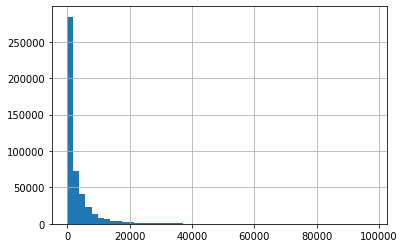

In [43]:
# Histograms to get an idea of the shape of the data

# Here we are looking at just the passenger distribution
flights['passengers'].hist(bins=50)

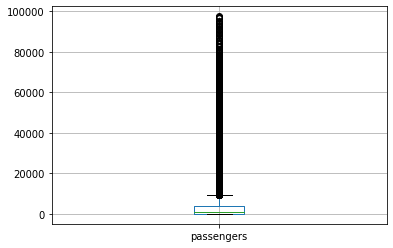

In [44]:
# Box plot to review shape of the data and any outliers for the flights data
# Looking at just the passengers
flights.boxplot(column=["passengers"])

By looking at the distribution of the flight data, we can see that it is skewed right, and there are quite a few outliers.

In [45]:
# Looking at total number of passengers per airline from 2019-2021
flights.groupby(by=["carrier_name"]).sum().sort_values("passengers", ascending=False)

,passengers,distance,carrier_group,year,quarter,month,distance_group
carrier_name,,,,,,,
Southwest Airlines Co.,239982441.0,82234004.0,221793,149303731,174751,449158,200032
American Airlines Inc.,230434647.0,38284660.0,77619,52250853,60632,155065,89875
Delta Air Lines Inc.,225606137.0,48243715.0,94875,63866284,73438,187641,112777
United Air Lines Inc.,159779711.0,50661021.0,81783,55052260,64983,167112,114647
SkyWest Airlines Inc.,65806366.0,18645019.0,97587,65693823,76178,195003,53751
...,...,...,...,...,...,...,...
Luxaviation Germany GmbH,8.0,8119.0,0,4038,8,20,17
TAG Aviation S.A.,7.0,15511.0,0,8076,4,10,32
Jet Aviation Business Jets AG,6.0,12132.0,0,6057,3,9,26


By looking at the above list, we can see some of the most popular airlines during 2019-2021.

In [46]:
# Make a Data Frame for US flights only
flights_US=flights[(flights['origin_country']=='US')& (flights['dest_country']=='US')]
most_US=DataFrame(flights_US.groupby(by=["carrier_name"]).sum())
most_US=most_US.sort_values("passengers", ascending=False)

# Top 10 airlines with the largest total number of passengers based on US flights only
most_US.iloc[0:11]

,passengers,distance,carrier_group,year,quarter,month,distance_group
carrier_name,,,,,,,
Southwest Airlines Co.,234361899.0,80095020.0,216348,145638640,170688,438794,194875
Delta Air Lines Inc.,191830437.0,24037268.0,70971,47775790,55589,142179,60259
American Airlines Inc.,190178164.0,19468885.0,53397,35945790,42146,107826,48195
United Air Lines Inc.,122110548.0,23308662.0,54519,36699664,43872,112970,55448
SkyWest Airlines Inc.,63954426.0,17894738.0,94695,63747062,74026,189531,51759
Spirit Air Lines,50361389.0,11679516.0,33243,22378496,26598,68314,28652
JetBlue Airways,46782458.0,11089826.0,28881,19442381,22940,58842,27410
Alaska Airlines Inc.,46541103.0,12117772.0,24669,16606538,19289,49323,28390
Frontier Airlines Inc.,34429690.0,12702328.0,37683,25367006,30051,77174,32091


In [47]:
# See how the number of passengers changed year over year by US flights
flights_US.groupby(["year"]).sum()

,passengers,distance,carrier_group,quarter,month,distance_group
year,,,,,,
2019,813886554.0,167971643.0,511250,526453,1372836,448563
2020,336386085.0,116729798.0,374625,358251,923956,314241
2021,49035586.0,20044225.0,62620,24667,36185,53207


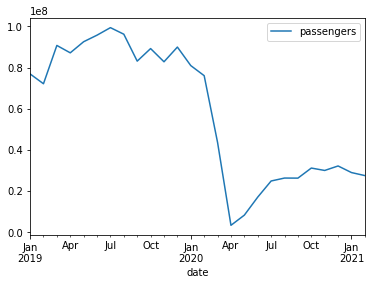

In [48]:
# Plot a line chart of overall passenger by month
flights2.plot.line(x='date', y='passengers')
plt.show()

As expected, we can see that the overall number of passengers declined rapidly at the start of the COVID-19 pandemic.

In [49]:
# Find the percent of passenger share for all years (2019-2021)
top_US=DataFrame(most_US.iloc[0:11,0])
top_US['percent']=top_US.passengers/top_US.passengers.sum()
top_US

,passengers,percent
carrier_name,,
Southwest Airlines Co.,234361899.0,0.226731
Delta Air Lines Inc.,191830437.0,0.185585
American Airlines Inc.,190178164.0,0.183986
United Air Lines Inc.,122110548.0,0.118135
SkyWest Airlines Inc.,63954426.0,0.061872
Spirit Air Lines,50361389.0,0.048722
JetBlue Airways,46782458.0,0.045259
Alaska Airlines Inc.,46541103.0,0.045026
Frontier Airlines Inc.,34429690.0,0.033309


In [50]:
## JUST THE TOP 4 - for all flights (US and international)

# If the airline is not one of the top 4, change it's name to other
pop=["Southwest Airlines Co.", "Delta Air Lines Inc.", "American Airlines Inc.", "United Air Lines Inc."]
flights_US.loc[~flights_US['carrier_name'].isin(pop), "carrier_name"] = "Other"
flights_group=flights_US.groupby(["carrier_name"]).sum()
flights_group['percent']=flights_group.passengers/flights_group.passengers.sum()
flights_group.sort_values("percent", ascending=False)

# Find most popular airline by passenger travel in 2019
flights_group19=flights_US[flights_US['year']==2019]
flights_group19=flights_group19.groupby(["carrier_name"]).sum()
flights_group19['percent']=flights_group19.passengers/flights_group19.passengers.sum()
flights_group19.sort_values("percent", ascending=False)

# Find most popular airline by passenger travel in 2020 & 2021
flights_group20=flights_US[flights_US['year']==2020 & 2021]
flights_group20=flights_group20.groupby(["carrier_name"]).sum()
flights_group20['percent']=flights_group20.passengers/flights_group20.passengers.sum()
flights_group20.sort_values("percent", ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,passengers,distance,carrier_group,year,quarter,month,distance_group,percent
carrier_name,,,,,,,,
Other,134680426.0,62011570.0,223038,201658620,238993,616091,179906,0.400375
Southwest Airlines Co.,66606949.0,30094308.0,83904,56495360,66165,171596,73575,0.198007
American Airlines Inc.,56676021.0,8005413.0,22161,14921740,17560,45034,19879,0.168485
Delta Air Lines Inc.,48382072.0,8997823.0,26817,18056780,20754,53186,22602,0.143829
United Air Lines Inc.,30040617.0,7620684.0,18705,12594700,14779,38049,18279,0.089304


In [51]:
## For US Flights

# If the airline is not a popular one, change it's name to other
flights_US.loc[~flights_US['carrier_name'].isin(list(top_US.index)), "carrier_name"] = "Other"
flights_group=flights_US.groupby(["carrier_name"]).sum()
flights_group['percent']=flights_group.passengers/flights_group.passengers.sum()
flights_group.sort_values("percent", ascending=False)

# Find most popular airline by passenger travel in 2019
flights_group19=flights_US[flights_US['year']==2019]
flights_group19=flights_group19.groupby(["carrier_name"]).sum()
flights_group19['percent']=flights_group19.passengers/flights_group19.passengers.sum()
flights_group19.sort_values("percent", ascending=False)

# Find most popular airline by passenger travel in 2020 & 2021
flights_group20=flights_US[flights_US['year']==2020 & 2021]
flights_group20=flights_group20.groupby(["carrier_name"]).sum()
flights_group20['percent']=flights_group20.passengers/flights_group20.passengers.sum()
flights_group20.sort_values("percent", ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,passengers,distance,carrier_group,year,quarter,month,distance_group,percent
carrier_name,,,,,,,,
Other,134680426.0,62011570.0,223038,201658620,238993,616091,179906,0.400375
Southwest Airlines Co.,66606949.0,30094308.0,83904,56495360,66165,171596,73575,0.198007
American Airlines Inc.,56676021.0,8005413.0,22161,14921740,17560,45034,19879,0.168485
Delta Air Lines Inc.,48382072.0,8997823.0,26817,18056780,20754,53186,22602,0.143829
United Air Lines Inc.,30040617.0,7620684.0,18705,12594700,14779,38049,18279,0.089304


In [52]:
# Count the number of flights each airline took
flight_count=DataFrame(flights_US.groupby(by=["carrier_name"]).count()).sort_values("passengers", ascending=False)

# Top 10 airlines that took the most number of flights
flight_count.iloc[0:11,1]

carrier_name
Other                     251556
Southwest Airlines Co.     72116
Delta Air Lines Inc.       23657
United Air Lines Inc.      18173
American Airlines Inc.     17799
Name: distance, dtype: int64

In [53]:
# Briefly explore the most popular destinations
flights.groupby(['dest_city_name'], as_index=False).agg({"passengers": "sum"}).sort_values('passengers', ascending=False)

,dest_city_name,passengers
83,"Atlanta, GA",77375100.0
314,"Chicago, IL",72711694.0
1130,"New York, NY",60445989.0
943,"Los Angeles, CA",58545503.0
393,"Dallas/Fort Worth, TX",57216208.0
...,...,...
1356,"Reykjavik, Iceland",1.0
1372,"Rock Hill, SC",1.0
647,"Hampton, GA",1.0
653,"Hannover, Germany",1.0


#### Exploring the COVID-19 Data

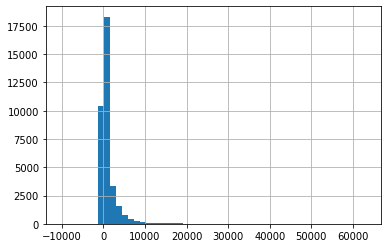

In [54]:
# Let's look at the distribution of COVID cases
covid['new_case'].hist(bins=50)

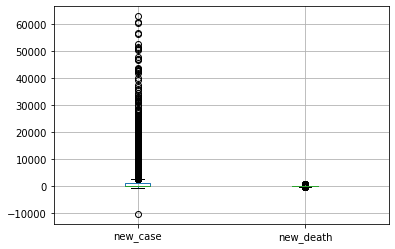

In [55]:
# Box plot to review shape of the data and any outliers
covid.boxplot(column=["new_case", "new_death"])

We can see that this data is also skewed to the right with multiple outliers in `new_case`.

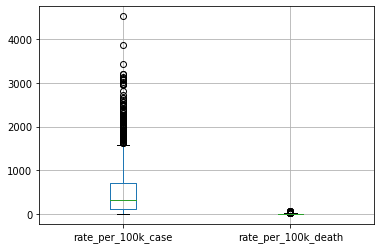

In [56]:
# Looking at the normalized data
covid_norm.boxplot(column=["rate_per_100k_case", "rate_per_100k_death"])
plt.show()

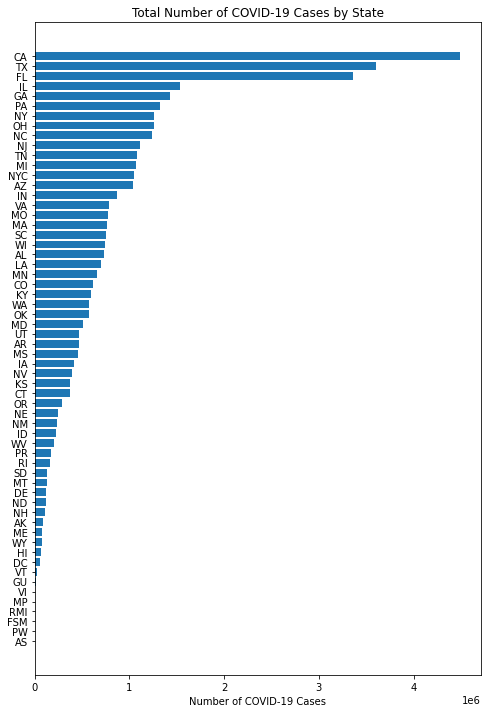

In [57]:
plt.figure(figsize=(8,12))
# bar plot with matplotlib
covid3=covid3.sort_values("new_case", ascending=True)
plt.barh('state', 'new_case', data=covid3.groupby(['state'], 
          as_index=False).agg({"new_case":"sum"}).sort_values("new_case"))
plt.xlabel('Number of COVID-19 Cases')
plt.title("Total Number of COVID-19 Cases by State")
plt.show()

Without normalizing the data, we can see that overall, CA has had the most COVID-19 cases.

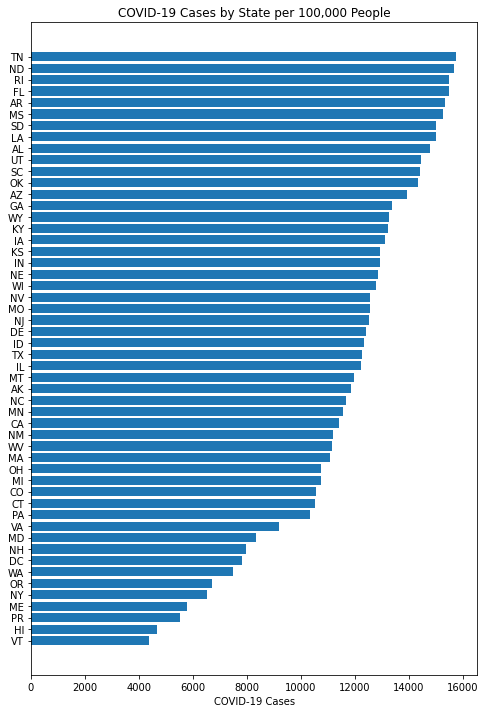

In [58]:
# Plotting normalized data
plt.figure(figsize=(8,12))
plt.xlabel('COVID-19 Cases')
plt.title('COVID-19 Cases by State per 100,000 People')
plt.barh('state', 'rate_per_100k_case', data=covid_norm.groupby(['state'], 
          as_index=False).agg({"rate_per_100k_case":"sum"}).sort_values("rate_per_100k_case"))
plt.show()

After normalizing the data, we can see that TN, ND, and RI had some of the largest numbers of COVID-19 cases per 100,000 people in the state's population.

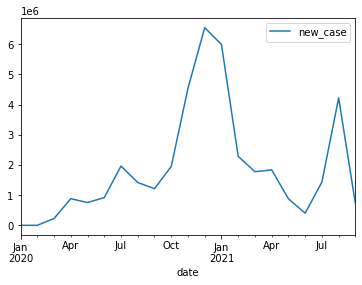

In [59]:
# Plot a line chart of overall COVID-19 cases
covid2.plot.line(x='date', y='new_case')
plt.show()

This line chart explores how the number of COVID-19 cases has changed month over month. We can see the months were the cases were the highest (during the fall and winter of last year and shortly after the 4th of July this year).

#### Exploring the Merged Data

In [62]:
# Summary statistics for our merged data
merged.describe()

,year,month,passengers,new_case,new_death
count,14.000000,14.000000,1.400000e+01,1.400000e+01,14.000000
mean,2020.142857,5.785714,3.261687e+07,2.050796e+06,37614.571429
std,0.363137,3.786181,2.188832e+07,2.135167e+06,30830.308573
min,2020.000000,1.000000,3.333681e+06,5.100000e+01,0.000000
25%,2020.000000,2.250000,2.522808e+07,7.861468e+05,20991.750000
50%,2020.000000,5.500000,2.824157e+07,1.316446e+06,31202.000000
75%,2020.000000,8.750000,3.193029e+07,2.207116e+06,52752.000000
max,2021.000000,12.000000,8.097166e+07,6.552343e+06,101623.000000


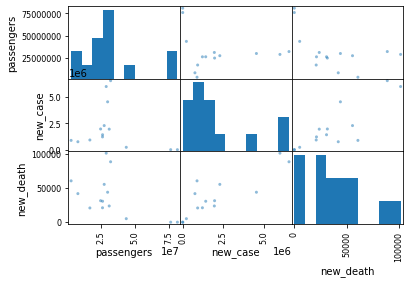

In [63]:
# Any correlation between variables?
scatter_matrix(merged[['passengers', 'new_case', 'new_death']])
plt.show()

There seems to be a weak linear relationship between all of the variables.

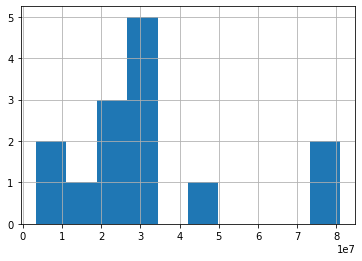

In [64]:
merged['passengers'].hist(bins=10)
plt.show()

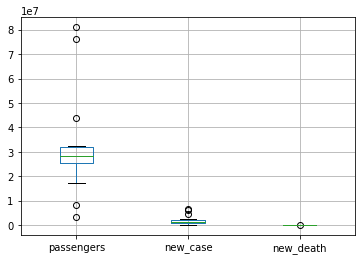

In [65]:
# Box plot to review shape of the data and any outliers
merged.boxplot(column=["passengers", "new_case", "new_death"])
plt.show()

### Visualizations of Travel Trends

The first COVID-19 case was reported in January of 2020 in the United States. For the sake of this project, I will consider anything prior to the start of 2020 as before the pandemic. January 2020 to present is considered during the pandemic.


#### Most Popular Airlines

Which airline is the most popular based on number of passengers?

**Before the Pandemic**

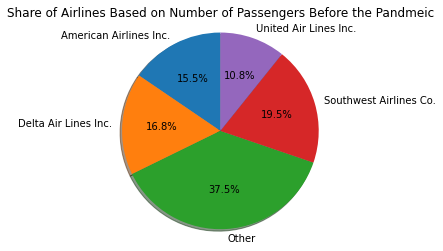

In [66]:
# Before pandemic
fig1, ax1 = plt.subplots()
ax1.pie(flights_group19['percent'], labels=flights_group19.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Share of Airlines Based on Number of Passengers Before the Pandmeic")
plt.show()

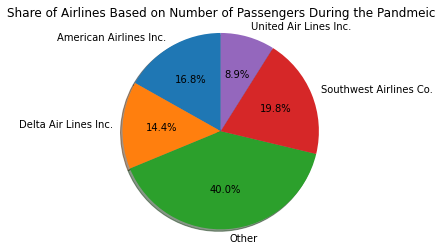

In [67]:
# DURING PANDEMIC
fig1, ax1 = plt.subplots()

ax1.pie(flights_group20['percent'], labels=flights_group20.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Share of Airlines Based on Number of Passengers During the Pandmeic")
plt.show()

We can see that Southwest, both before and after the pandemic, is the most popular recognizable airline. Out of all of the passengers that flew before and during the pandemic, 20% flew Southwest.

#### Most Popular Destinations

What destinataions were the most popular based on the number of passengers?

In [68]:
import warnings

warnings.simplefilter("ignore")

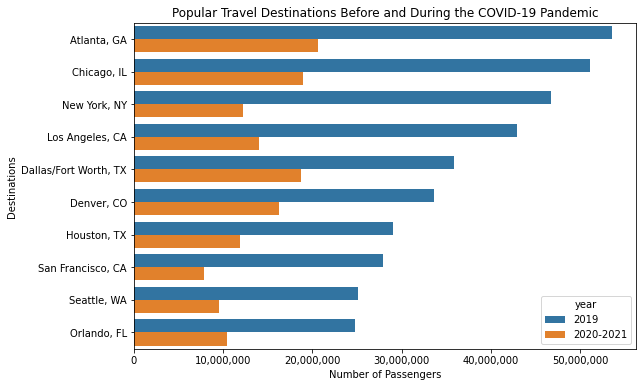

In [88]:
df1=flights[flights['year']==2019].groupby(['dest_city_name'], as_index=False).agg({"passengers": "sum"}).sort_values('passengers', ascending=False)
new1=df1.iloc[:10]
new1.loc[:,'year']=2019

# Turn the column of popular destinations in 2019 to a list
pop_dest=new1['dest_city_name'].tolist()

df2=flights[flights['year']==2020 & 2021].groupby(['dest_city_name'], as_index=False).agg({"passengers": "sum"}).sort_values('passengers', ascending=False)
#new2=df2.iloc[:10]
#new2['year']="2020-2021"

# Make a subset data frame that contains lists the number of passengers for each
# of the popular destinations in 2019
new3=df2[df2['dest_city_name'].isin(pop_dest)]
new3.loc[:,'year']="2020-2021"

test=pd.concat([new1,new3])
fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(x="passengers", y="dest_city_name", 
            data=test, hue="year").set(title='Popular Travel Destinations Before and During the COVID-19 Pandemic', 
                                       xlabel='Number of Passengers', ylabel='Destinations')
plt.ticklabel_format(style='plain', axis='x') #remove scientific notation
# after plotting the data, format the labels
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
#plt.xticks(rotation = 30) # Rotates X-Axis Ticks by 45-degrees
plt.show()

By looking at the above bar chart, we can see the most popular travel destinations in 2019 (blue bars). We also can see how the number of passengers changes for those same destinations during the pandemic. Less people were traveling to those places during the pandemic, and some destinations became less popular (Seattle, San Franscisco, New York). I wonder if this is because of the COVID-19 cases in those states. We will explore that soon.

#### International Flights

What was the percentage of international flights?



In [ ]:
# Make two stacked bar charts - one for before pandemic, one for after
# showing the breakdown of # of passengers for US vs international



### Visualizing COVID-19 Trends

In [109]:
# source: https://plotly.com/python/bubble-maps/
import plotly.express as px
df = px.data.gapminder()
nm=covid_norm.sort_values(by="date")
fig = px.scatter_geo(nm, locations="state", locationmode="USA-states",
                     hover_name="name", size="rate_per_100k_case",
                     animation_frame="date",
                     projection="natural earth",
                     title="Bubble Map of COVID-19 Cases in the US by Month")
fig.show()

The above animated bubble chart shows how the COVID-19 cases have changed over time for each state. We can see the states that become hot spots by the larger bubble sizes, which indicate more COVID-19 cases.

In [93]:
# Source: https://plotly.com/python/choropleth-maps/

import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=covid_norm['state'],
    z=covid_norm['rate_per_100k_case'].astype(float),
    locationmode='USA-states',
    colorscale='Blues',
    autocolorscale=False,
    text=covid_norm['name'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Rate per 100K",
))

fig.update_layout(
    title_text='COVID-19 Cases in the United States',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)')
)

fig.show()

# Make it interactive
# https://medium.com/@anikanacey/adventures-in-plotly-an-interactive-choropleth-map-646f6a2f4e3a

In [108]:
# Source: https://plotly.com/python/choropleth-maps/
import plotly.express as px

fig = px.choropleth(nm, locations="state",
                    color="rate_per_100k_case",
                    hover_name="name", # column to add to hover information
                    color_continuous_scale="Blues", 
                    scope="usa", 
                    locationmode='USA-states',
                    animation_frame="date")

fig.update_layout(
    title_text='COVID-19 Cases in the United States',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)')
)

fig.show()

This is another visualization showing the total number of COVID-19 cases for each state. I have selected a color scale that changes in saturation since the number of COVID-19 cases in a quantitative variable. The slider lets you look at the values for each month from the start of the pandemic to September of

### Visualizations Exploring the Relationship Between Traveling and COVID-19 Cases

### **References**

* https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/
* https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH
* https://www.reddit.com/r/GoogleColab/comments/k6qpff/using_an_image_located_in_google_drive_in_colab/
* https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EEE&Yv0x=D
* https://plotly.com/python/gantt/
* https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
* https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
* https://www.kite.com/python/answers/how-to-find-rows-with-nan-values-in-a-pandas-dataframe-in-python
* https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
* http://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
* https://en.wikipedia.org/wiki/COVID-19_pandemic_in_the_United_States
* https://queirozf.com/entries/matplotlib-examples-number-formatting-for-axes-labels
* https://plotly.com/python/bubble-maps/
* https://plotly.com/python/choropleth-maps/ 
* https://www.codegrepper.com/code-examples/python/frameworks/django/how+to+increase+figure+size+in+seaborn